Import all the necessary packages here:

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

load the dataset:

In [2]:
df = pd.read_csv("../datasets/sentiment_dataset.csv", encoding="ISO-8859-1")

Check the meta data:

In [3]:
df.columns

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

Define column names.

In [4]:
df.columns = ["label", "id", "date", "query", "username", "comment"]
df.columns

Index(['label', 'id', 'date', 'query', 'username', 'comment'], dtype='object')

In [5]:
df.head()

,label,id,date,query,username,comment
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


Check unique labels:

In [6]:
df["label"].unique()

array([0, 4], dtype=int64)

Downscale the label

In [7]:
df["label"] = df["label"].replace(4, 1)
df["label"].unique()

array([0, 1], dtype=int64)

Drop the irrelevant columns!

In [8]:
df = df.dropna()
df

,label,id,date,query,username,comment
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [9]:
df = df.drop(columns=["id", "date", "query", "username"])
df

,label,comment
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,1,Just woke up. Having no school is the best fee...
1599995,1,TheWDB.com - Very cool to hear old Walt interv...
1599996,1,Are you ready for your MoJo Makeover? Ask me f...
1599997,1,Happy 38th Birthday to my boo of alll time!!! ...


Create the tf-idfs for each comment:

In [10]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["comment"])
X

<1599999x684357 sparse matrix of type '<class 'numpy.float64'>'
	with 18986976 stored elements in Compressed Sparse Row format>

In [11]:
y = df["label"]
y

0          0
1          0
2          0
3          0
4          0
          ..
1599994    1
1599995    1
1599996    1
1599997    1
1599998    1
Name: label, Length: 1599999, dtype: int64

Now let's split the test and training data!

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

Let's fit a new instance of LR to this data:

In [13]:
model = LogisticRegression(max_iter=1000)
model

LogisticRegression(max_iter=1000)

In [14]:
model =model.fit(X_train, y_train)

In [15]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80    319728
           1       0.79      0.82      0.80    320272

    accuracy                           0.80    640000
   macro avg       0.80      0.80      0.80    640000
weighted avg       0.80      0.80      0.80    640000



In [17]:
def make_prediction(comment: str) -> None:
    """
    Uses the previosly trianed model to determine if a comment is positive
    or negative in terms of it's sentiment.
    Positive: 1
    Negative: 0.
    """
    comment = vectorizer.transform([comment])
    val= model.predict_proba(comment)
    print(val)
    return val

In [19]:
import joblib

joblib.dump(vectorizer, "fitted_vectorizer.joblib")
joblib.dump(model, "logisitic_regression.joblib")

['logisitic_regression.joblib']

In [18]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

def cross_val_classification(model, X, y):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    # Perform cross-validation and get predictions for each fold
    y_pred_cv = []
    y_true_cv = []
    y_proba_cv = []
    for train_idx, test_idx in cv.split(X, y):
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:,1]
        y_pred_cv.append(y_pred)
        y_true_cv.append(y_test)
        y_proba_cv.append(y_proba)
    # Concatenate predictions across all folds
    y_pred_cv = np.concatenate(y_pred_cv)
    y_true_cv = np.concatenate(y_true_cv)
    y_proba_cv = np.concatenate(y_proba_cv)
    # Compute classification metrics
    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    precision = cross_val_score(model, X, y, cv=cv, scoring='precision')
    recall = cross_val_score(model, X, y, cv=cv, scoring='recall')
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1')
    auc = roc_auc_score(y_true_cv, y_proba_cv)
    # Print classification report
    print(classification_report(y_true_cv, y_pred_cv))
    # Plot confusion matrix
    cm = confusion_matrix(y_true_cv, y_pred_cv)
    fig, ax = plt.subplots()
    ax.imshow(cm, cmap='Blues', aspect='auto')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Negative', 'Positive'])
    ax.set_yticklabels(['Negative', 'Positive'])
    ax.set_title('Confusion Matrix')
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
    plt.show()
    # Plot ROC-AUC curve
    fpr, tpr, _ = roc_curve(y_true_cv, y_proba_cv)
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    # Print classification metrics
    print('Accuracy:', np.mean(accuracy))
    print('Precision:', np.mean(precision))
    print('Recall:', np.mean(recall))
    print('F1-score:', np.mean(f1))
    print('ROC-AUC:', auc)


              precision    recall  f1-score   support

           0       0.81      0.79      0.80    799999
           1       0.79      0.82      0.81    800000

    accuracy                           0.80   1599999
   macro avg       0.80      0.80      0.80   1599999
weighted avg       0.80      0.80      0.80   1599999



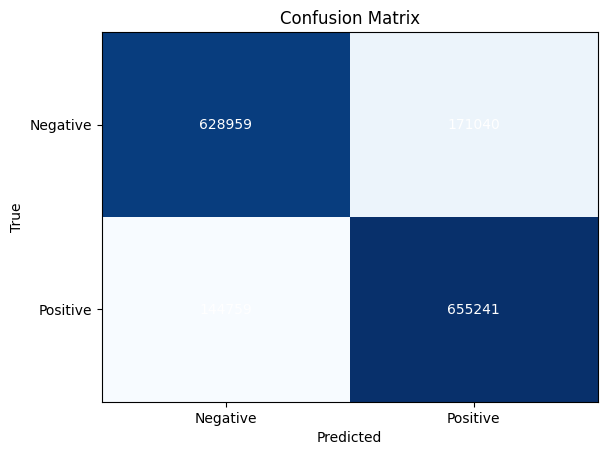

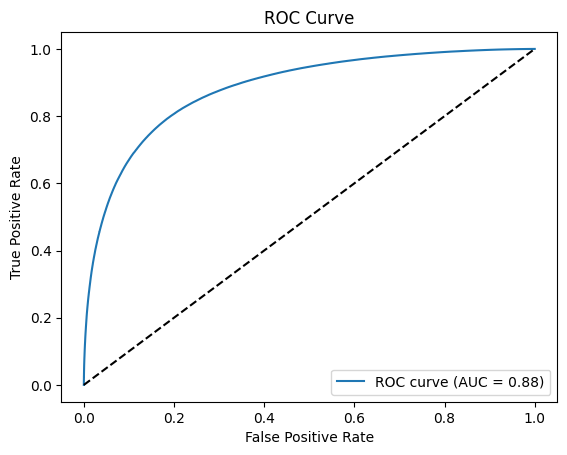

Accuracy: 0.8026255017750057
Precision: 0.793000225331568
Recall: 0.8190512499999999
F1-score: 0.8058148210412055
ROC-AUC: 0.8822669915642082


In [19]:
#cross_val_classification(model, X, y)

In [22]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'C': [0.1, 1, 10],
#     'penalty': ['l1', 'l2']
# }

# # perform grid search cross-validation to find the best hyperparameters
# grid_search = GridSearchCV(model, param_grid, cv=5)
# grid_search.fit(X, y)

# # return the best fit model with the highest accuracy
# best_lr_model = grid_search.best_estimator_
# y_pred = best_lr_model.predict(X_test)


Gotta save em' trained objects.